#                             Cytology features of breast cancer biopsy

In [106]:
# Dependancies
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from joblib import dump

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd

In [107]:
# Preventing kernel death
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Load and Clean the Data

In [108]:
# Load the data in
df = pd.read_csv("./db/cytology_ml.csv")
df.head(2)

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0


In [109]:
# Inspect cytology data
print(df.shape)
print(df.dtypes)
df.head(2)

(699, 11)
id             int64
thickness      int64
size           int64
shape          int64
adhesion       int64
single         int64
nuclei       float64
chromatin      int64
nucleoli       int64
mitosis        int64
class          int64
dtype: object


,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0


In [110]:
# Finding missing values 
print('cytology missing values:\n{}'.format(df.isnull().sum()))

# Find duplicated records
print('cytology duplicated nums: {}'.format(df.duplicated().sum()))

# Find the unique values of 'diagnosis'.
print('\nUnique values of "diagnosis": {}'.format(df['class'].unique()))

cytology missing values:
id            0
thickness     0
size          0
shape         0
adhesion      0
single        0
nuclei       16
chromatin     0
nucleoli      0
mitosis       0
class         0
dtype: int64
cytology duplicated nums: 8

Unique values of "diagnosis": [0 1]


In [111]:
# Droppimg NaN values from cytolgy dataset 
df.dropna(inplace=True)

In [112]:
# Drop unnesesary colums
dropped_df = df.drop(columns=['id'])

# Machine Learning

In [113]:
# Assing the label and the features
y = dropped_df["class"]
X = dropped_df.drop(columns=["class"])

In [114]:
# Create a train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [115]:
# Check the features data / not sure what that does
X_train.head()

,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis
133,3,1,1,1,2,1.0,2,2,1
6,1,1,1,1,2,10.0,3,1,1
0,5,1,1,1,2,1.0,3,1,1
278,1,1,1,1,2,1.0,3,1,1
58,5,2,3,1,6,10.0,5,1,1


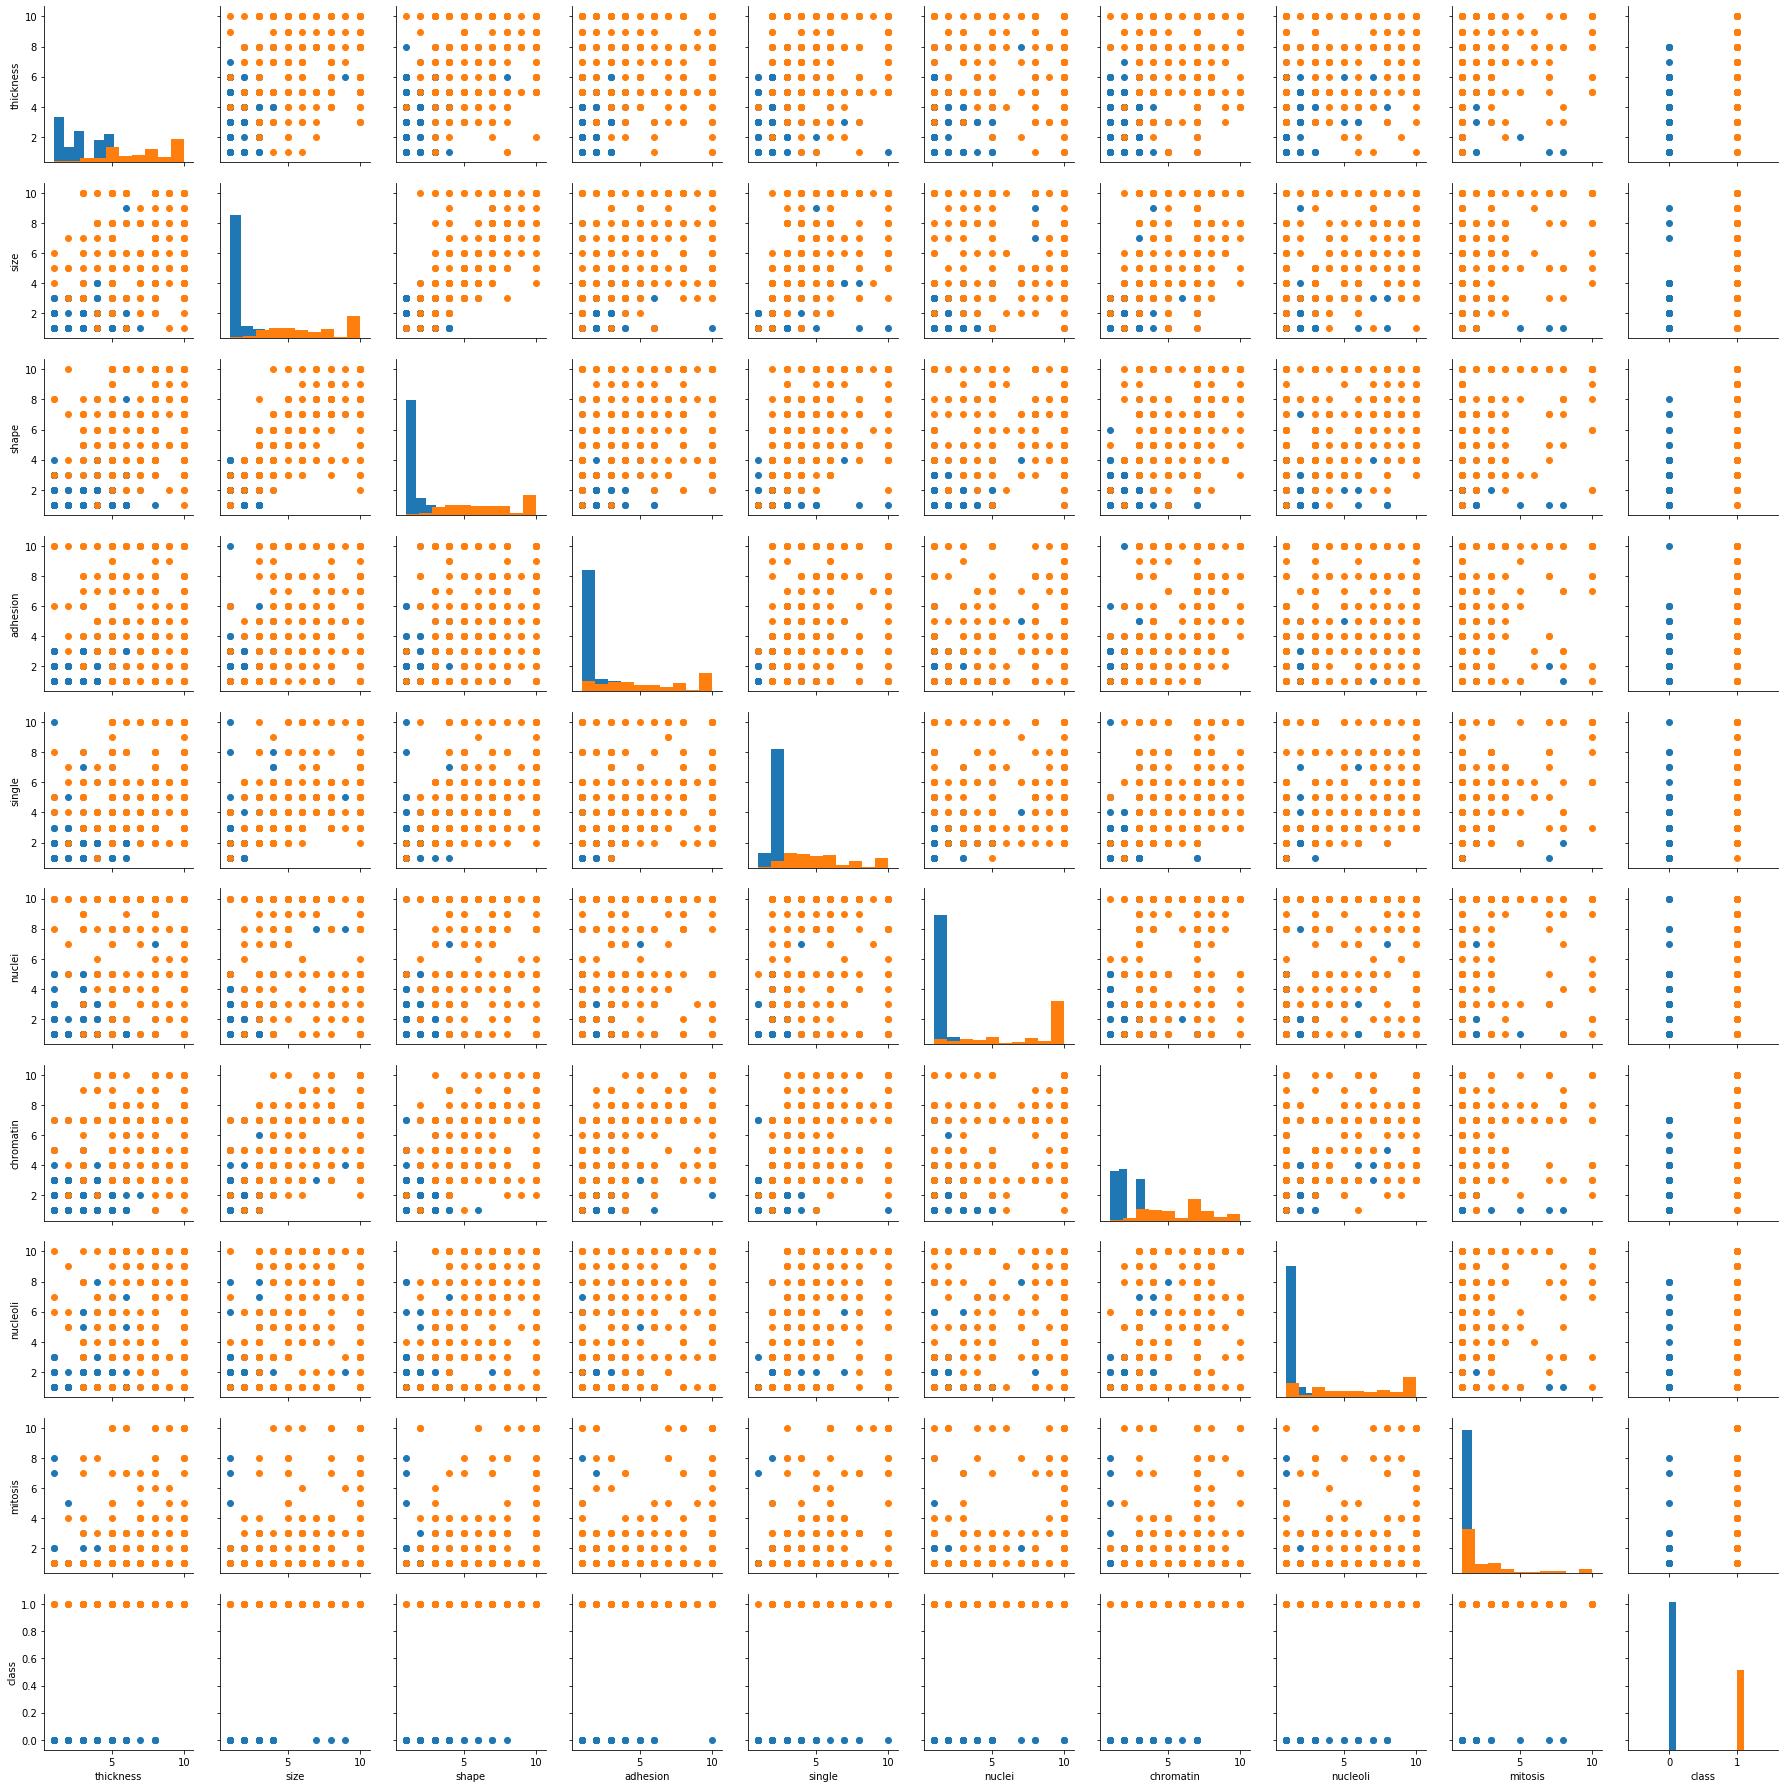

In [23]:
# Inspect using seaborn
import seaborn as sns
g = sns.PairGrid(dropped_df, hue='class')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

In [116]:
# Scale the data
# Create a StandardScaler model and fit it to the training data
# NOTE: Better to scale the data using Standard scaler if you are not very familiar with the data

X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_scaler
dump(X_scaler, "scaler_2.out")

['scaler_2.out']

# Logistics Regression Model

In [117]:
# Logistics Regression Model 
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
log_score = log_model.score(X_test_scaled, y_test)
print(log_score)

0.9590643274853801


/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Random Forest Model

In [118]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf_score = rf.score(X_test_scaled, y_test)
print(rf_score)

0.9649122807017544


In [119]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances
# tells you the importance of the feature - spits out an array with the numbers 

array([0.04684812, 0.24420408, 0.25883949, 0.03468681, 0.09474933,
       0.17553626, 0.09153044, 0.04390933, 0.00969614])

In [120]:
# TODO: Sort imporatnce below

# We can sort the features by their importance
# by fitting the numbers form n array - we know now what is the most important feature 
# sorted(zip(rf.feature_importances_, rf.feature_names), reverse=True)

# Decision Tree Model

In [121]:
# TODO: Make the decison tree below

# # Assign & fit the model 
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(cancer.data, cancer.target)

# import graphviz 
# dot_data = tree.export_graphviz(
#     clf, out_file = None, 
#     feature_names=cancer.feature_names,  
#     class_names = cancer.target_names,  
#     filled = True, rounded = True,  
#     special_characters = True)  

# import pydotplus
# graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png('cancer.png')

# graph = graphviz.Source(dot_data)  
# graph 


# # Get the score of the accuracy
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)
# clf_score = clf.score(X_test, y_test)
# print(clf_score)

# Neural Network 

In [122]:
# NOTE: For the neural network we need to transfrom the data to categorical
from tensorflow.keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [130]:
# first, create a normal neural network with 2 inputs, 4 hidden nodes, and 39 outputs
# Hidden Layer is the middle layer where all the features go through from the input, the data has benn processing 
# and then goes to output. Nods are in the hidden layer.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

neural_model = Sequential()
neural_model.add(Dense(units=6, activation='relu', input_dim=9))
neural_model.add(Dense(units=2, activation='softmax')) 
# softmax decides what the output is based on nods and numbers 

In [131]:
neural_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 6)                 60        
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 14        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


In [132]:
# Compile the model
neural_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [133]:
# Fit the model to the training data
neural_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=200,
    shuffle=True,
    verbose=2
)

Epoch 1/200
512/512 - 0s - loss: 0.6882 - acc: 0.2637
Epoch 2/200
512/512 - 0s - loss: 0.6392 - acc: 0.5898
Epoch 3/200
512/512 - 0s - loss: 0.5921 - acc: 0.8301
Epoch 4/200
512/512 - 0s - loss: 0.5470 - acc: 0.8535
Epoch 5/200
512/512 - 0s - loss: 0.5005 - acc: 0.8652
Epoch 6/200
512/512 - 0s - loss: 0.4539 - acc: 0.8828
Epoch 7/200
512/512 - 0s - loss: 0.4052 - acc: 0.9004
Epoch 8/200
512/512 - 0s - loss: 0.3585 - acc: 0.9180
Epoch 9/200
512/512 - 0s - loss: 0.3144 - acc: 0.9238
Epoch 10/200
512/512 - 0s - loss: 0.2733 - acc: 0.9395
Epoch 11/200
512/512 - 0s - loss: 0.2379 - acc: 0.9434
Epoch 12/200
512/512 - 0s - loss: 0.2079 - acc: 0.9570
Epoch 13/200
512/512 - 0s - loss: 0.1835 - acc: 0.9668
Epoch 14/200
512/512 - 0s - loss: 0.1643 - acc: 0.9668
Epoch 15/200
512/512 - 0s - loss: 0.1486 - acc: 0.9727
Epoch 16/200
512/512 - 0s - loss: 0.1356 - acc: 0.9766
Epoch 17/200
512/512 - 0s - loss: 0.1254 - acc: 0.9766
Epoch 18/200
512/512 - 0s - loss: 0.1170 - acc: 0.9766
Epoch 19/200
512/51

512/512 - 0s - loss: 0.0481 - acc: 0.9863
Epoch 150/200
512/512 - 0s - loss: 0.0480 - acc: 0.9863
Epoch 151/200
512/512 - 0s - loss: 0.0480 - acc: 0.9863
Epoch 152/200
512/512 - 0s - loss: 0.0479 - acc: 0.9863
Epoch 153/200
512/512 - 0s - loss: 0.0478 - acc: 0.9863
Epoch 154/200
512/512 - 0s - loss: 0.0477 - acc: 0.9863
Epoch 155/200
512/512 - 0s - loss: 0.0477 - acc: 0.9863
Epoch 156/200
512/512 - 0s - loss: 0.0476 - acc: 0.9863
Epoch 157/200
512/512 - 0s - loss: 0.0475 - acc: 0.9863
Epoch 158/200
512/512 - 0s - loss: 0.0474 - acc: 0.9863
Epoch 159/200
512/512 - 0s - loss: 0.0474 - acc: 0.9863
Epoch 160/200
512/512 - 0s - loss: 0.0473 - acc: 0.9863
Epoch 161/200
512/512 - 0s - loss: 0.0472 - acc: 0.9863
Epoch 162/200
512/512 - 0s - loss: 0.0471 - acc: 0.9863
Epoch 163/200
512/512 - 0s - loss: 0.0470 - acc: 0.9863
Epoch 164/200
512/512 - 0s - loss: 0.0470 - acc: 0.9863
Epoch 165/200
512/512 - 0s - loss: 0.0469 - acc: 0.9863
Epoch 166/200
512/512 - 0s - loss: 0.0468 - acc: 0.9863
Epoch 

In [138]:
# Get the results 
model_loss, model_accuracy = neural_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

nm_score = neural_model.evaluate(X_test_scaled, y_test_categorical)
print(nm_score)

171/171 - 0s - loss: 0.1292 - acc: 0.9649
Deep Neural Network - Loss: 0.1292413145695862, Accuracy: 0.9649122953414917
171/171 [==============================] - 0s 51us/sample - loss: 0.1292 - acc: 0.9649
[0.1292413145695862, 0.9649123]


# Deep Learning Model

In [54]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=9))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [55]:
deep_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 6)                 60        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 14        
Total params: 116
Trainable params: 116
Non-trainable params: 0
_________________________________________________________________


In [56]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=50,
    shuffle=True,
    verbose=2
)

Epoch 1/50
512/512 - 0s - loss: 0.7053 - acc: 0.6016
Epoch 2/50
512/512 - 0s - loss: 0.6463 - acc: 0.8281
Epoch 3/50
512/512 - 0s - loss: 0.5938 - acc: 0.8887
Epoch 4/50
512/512 - 0s - loss: 0.5448 - acc: 0.9238
Epoch 5/50
512/512 - 0s - loss: 0.4925 - acc: 0.9434
Epoch 6/50
512/512 - 0s - loss: 0.4371 - acc: 0.9512
Epoch 7/50
512/512 - 0s - loss: 0.3788 - acc: 0.9609
Epoch 8/50
512/512 - 0s - loss: 0.3206 - acc: 0.9668
Epoch 9/50
512/512 - 0s - loss: 0.2674 - acc: 0.9688
Epoch 10/50
512/512 - 0s - loss: 0.2231 - acc: 0.9727
Epoch 11/50
512/512 - 0s - loss: 0.1874 - acc: 0.9727
Epoch 12/50
512/512 - 0s - loss: 0.1597 - acc: 0.9746
Epoch 13/50
512/512 - 0s - loss: 0.1399 - acc: 0.9746
Epoch 14/50
512/512 - 0s - loss: 0.1250 - acc: 0.9727
Epoch 15/50
512/512 - 0s - loss: 0.1139 - acc: 0.9727
Epoch 16/50
512/512 - 0s - loss: 0.1054 - acc: 0.9727
Epoch 17/50
512/512 - 0s - loss: 0.0988 - acc: 0.9727
Epoch 18/50
512/512 - 0s - loss: 0.0936 - acc: 0.9727
Epoch 19/50
512/512 - 0s - loss: 0.08

In [134]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

# Determine deep model score
dm_score = deep_model.evaluate(X_test_scaled, y_test_categorical)
print(dm_score)

171/171 - 0s - loss: 0.1216 - acc: 0.9591
Deep Neural Network - Loss: 0.12156790098425937, Accuracy: 0.9590643048286438
171/171 [==============================] - 0s 58us/sample - loss: 0.1216 - acc: 0.9591
[0.12156790098425937, 0.9590643]


# KNN Classifier

k: 1, Train/Test Score: 1.000/0.947
k: 3, Train/Test Score: 0.982/0.942
k: 5, Train/Test Score: 0.982/0.953
k: 7, Train/Test Score: 0.980/0.953
k: 9, Train/Test Score: 0.979/0.953
k: 11, Train/Test Score: 0.979/0.953
k: 13, Train/Test Score: 0.977/0.953
k: 15, Train/Test Score: 0.973/0.953
k: 17, Train/Test Score: 0.975/0.959
k: 19, Train/Test Score: 0.975/0.959
k: 21, Train/Test Score: 0.975/0.959
k: 23, Train/Test Score: 0.973/0.959
k: 25, Train/Test Score: 0.971/0.959
k: 27, Train/Test Score: 0.973/0.959
k: 29, Train/Test Score: 0.971/0.953
k: 31, Train/Test Score: 0.971/0.959
k: 33, Train/Test Score: 0.971/0.953
k: 35, Train/Test Score: 0.971/0.953
k: 37, Train/Test Score: 0.969/0.953
k: 39, Train/Test Score: 0.967/0.953
k: 41, Train/Test Score: 0.965/0.953
k: 43, Train/Test Score: 0.967/0.953
k: 45, Train/Test Score: 0.965/0.947
k: 47, Train/Test Score: 0.967/0.947
k: 49, Train/Test Score: 0.967/0.947


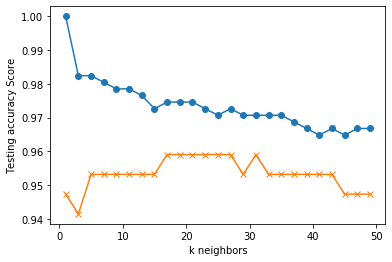

In [135]:
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the testing and training scores for each k for visual representation
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [136]:
# Set model to k which provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print(knn_score)

0.9532163742690059


# Determine and Save Best Model

In [137]:
# Print out all scores
print(f"Logistic Regression Model Score: {log_score}")
print(f"Random Forest Classifier Score: {rf_score}")
# print(f"Decision Tree Classifier Score: {clf_score}")
print(f"KNN Model Score: {knn_score}")
print(f"Deep Learning Model Score: {dm_score}")
print(f"Neural Network Model Score: {nm_score}")

Logistic Regression Model Score: 0.9590643274853801
Random Forest Classifier Score: 0.9649122807017544
KNN Model Score: 0.9532163742690059
Deep Learning Model Score: [0.12156790098425937, 0.9590643]
Neural Network Model Score: [0.12006019040593627, 0.9649123]


In [102]:
dump(rf, 'rf_2.joblib')

['rf_2.joblib']

In [139]:
neural_model.save('neural_model.h5')